In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/structured_data_original.csv')
df.head()

,Date,Time,Temperature_C,Dew_Point_C,Humidity_%,Wind,Speed_kmh,Gust_kmh,Pressure_hPa,Precip_Rate_mm,Precip_Accum_mm,UV,Solar_w/m2
0,2017/03/09,12:00 AM,25.33,16.17,57.0,NNE,1.61,14.48,1013.21,0.0,0.0,7.0,855.0
1,2017/03/09,12:05 AM,25.33,16.17,57.0,NNE,1.61,14.48,1013.21,0.0,0.0,7.0,855.0
2,2017/03/09,12:10 AM,25.33,16.17,57.0,NNE,1.61,14.48,1013.21,0.0,0.0,7.0,855.0
3,2017/03/09,12:15 AM,25.33,16.17,57.0,NNE,1.61,14.48,1013.21,0.0,0.0,7.0,855.0
4,2017/03/09,12:20 AM,25.33,16.17,57.0,NNE,1.61,14.48,1013.21,0.0,0.0,7.0,855.0


In [25]:
df.shape

(142743, 13)

In [2]:
df['year'] = df['Date'].apply(lambda x: x.split('/')[0]).astype(int)
df['month'] = df['Date'].apply(lambda x: x.split('/')[1]).astype(int)
df['day'] = df['Date'].apply(lambda x: x.split('/')[2]).astype(int)
df['hour'] = df['Time'].apply(lambda x: x.split(':')[0]).astype(int)
df['minute'] = df['Time'].apply(lambda x: x.split(':')[1][:2]).astype(int)
df['AP'] = df['Time'].apply(lambda x: x.split()[1])
df['hour'] = df['hour']+(df['AP'] == 'PM').astype(int)*12
df['hour'] = df['hour'] - ((df['hour'] == 12) | (df['hour'] == 24)).astype(int)*12
df = df[['year', 'month', 'day', 'hour', 'minute', 'Temperature_C', 'Dew_Point_C', 'Humidity_%', 'Speed_kmh', 'Gust_kmh', 'Pressure_hPa', 'UV', 'Solar_w/m2']]

In [27]:
df.head()

,year,month,day,hour,minute,Temperature_C,Dew_Point_C,Humidity_%,Speed_kmh,Gust_kmh,Pressure_hPa,UV,Solar_w/m2
0,2017,3,9,0,0,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,855.0
1,2017,3,9,0,5,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,855.0
2,2017,3,9,0,10,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,855.0
3,2017,3,9,0,15,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,855.0
4,2017,3,9,0,20,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,855.0


In [3]:
df['DateTime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

In [135]:
df.head()

,Temperature_C,Dew_Point_C,Humidity_%,Speed_kmh,Gust_kmh,Pressure_hPa,UV,Solar_w/m2,DateTime
0,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:00:00
1,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:05:00
2,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:10:00
3,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:15:00
4,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:20:00


<AxesSubplot: xlabel='DateTime'>

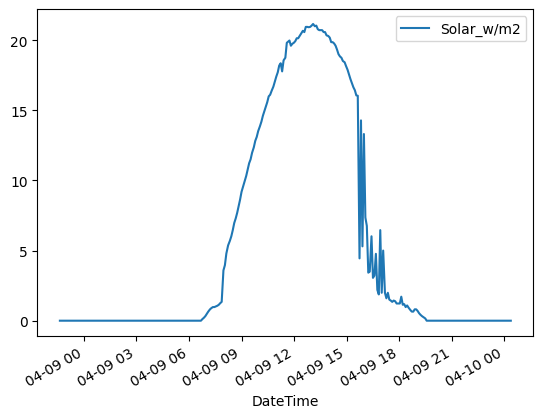

In [159]:
df.loc[4200:4500].plot(x='DateTime', y='Solar_w/m2')

In [4]:
df[['Temperature_C', 'Dew_Point_C', 'Humidity_%', 'Speed_kmh', 'Gust_kmh', 'Pressure_hPa', 'UV', 'Solar_w/m2']] = df[['Temperature_C', 'Dew_Point_C', 'Humidity_%', 'Speed_kmh', 'Gust_kmh', 'Pressure_hPa', 'UV', 'Solar_w/m2']].astype(float)

In [5]:
df['Solar_w/m2'] = df['Solar_w/m2'] / df['Solar_w/m2'].max() * 30

In [31]:
df.head()

,Temperature_C,Dew_Point_C,Humidity_%,Speed_kmh,Gust_kmh,Pressure_hPa,UV,Solar_w/m2,DateTime
0,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:00:00
1,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:05:00
2,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:10:00
3,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:15:00
4,25.33,16.17,57.0,1.61,14.48,1013.21,7.0,19.791667,2017-03-09 00:20:00


In [6]:
df.to_csv('./data/structured_data_clean.csv')
df['Solar_w/m2'].max()

30.0

C:\Users\alexs\AppData\Local\Temp\ipykernel_28180\3872827930.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[:-1].corr(), vmin=df[:-1].corr().values.min(), vmax=1, square=True,
C:\Users\alexs\AppData\Local\Temp\ipykernel_28180\3872827930.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[:-1].corr()['Solar_w/m2'])


Temperature_C    0.550392
Dew_Point_C      0.388232
Humidity_%      -0.434549
Speed_kmh        0.314009
Gust_kmh         0.501886
Pressure_hPa    -0.039327
UV               0.832997
Solar_w/m2       1.000000
Name: Solar_w/m2, dtype: float64


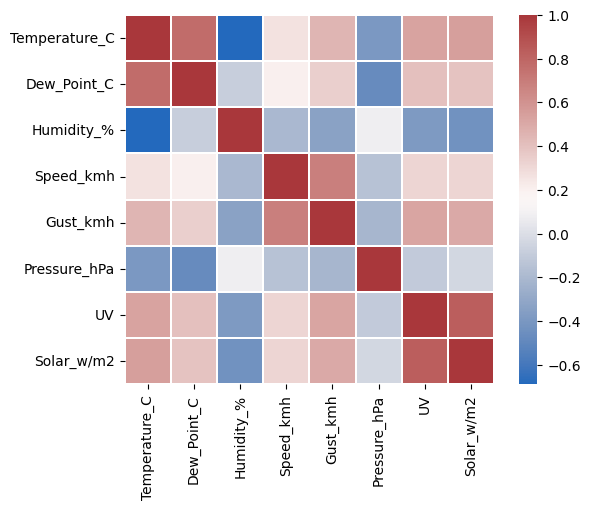

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[:-1].corr(), vmin=df[:-1].corr().values.min(), vmax=1, square=True, 
        linewidths=0.1, annot_kws={"size":8}, cmap='vlag')

print(df[:-1].corr()['Solar_w/m2'])

In [7]:
import datetime as dt

train_timestamp = np.load('./data/times_trainval.npy', allow_pickle=True)
test_timestamp = np.load('./data/times_test.npy', allow_pickle=True)

train_ts = pd.DataFrame({'DateTime':train_timestamp})
test_ts = pd.DataFrame({'DateTime':test_timestamp})

train_ts['DateTime'] = train_ts['DateTime'].apply(lambda x: dt.datetime(x.year, x.month, x.day, x.hour, x.minute))

train_ts['DateTime'], df['DateTime']

(0        2017-03-09 06:47:00
 1        2017-03-09 06:48:00
 2        2017-03-09 06:49:00
 3        2017-03-09 06:50:00
 4        2017-03-09 06:51:00
                  ...        
 349367   2019-10-26 17:55:00
 349368   2019-10-26 17:56:00
 349369   2019-10-26 17:57:00
 349370   2019-10-26 17:58:00
 349371   2019-10-26 17:59:00
 Name: DateTime, Length: 349372, dtype: datetime64[ns],
 0        2017-03-09 00:00:00
 1        2017-03-09 00:05:00
 2        2017-03-09 00:10:00
 3        2017-03-09 00:15:00
 4        2017-03-09 00:20:00
                  ...        
 142738   2019-10-26 23:39:00
 142739   2019-10-26 23:44:00
 142740   2019-10-26 23:49:00
 142741   2019-10-26 23:54:00
 142742   2019-10-26 23:59:00
 Name: DateTime, Length: 142743, dtype: datetime64[ns])

In [8]:
import h5py
filename = "./data/2017_2019_images_pv_processed.hdf5"
f = h5py.File(filename, 'r')

import numpy as np
import pandas as pd

train_imarr = np.array(f['trainval']['images_log'])
train_pvlog = np.array(f['trainval']['pv_log'])
test_imarr = np.array(f['test']['images_log'])
test_pvlog = np.array(f['test']['pv_log'])

len(train_imarr), len(test_imarr)

C:\Users\danyu\AppData\Local\Temp\ipykernel_20284\312593878.py:8: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  train_imarr = np.array(f['trainval']['images_log'])
C:\Users\danyu\AppData\Local\Temp\ipykernel_20284\312593878.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  train_pvlog = np.array(f['trainval']['pv_log'])
C:\Users\danyu\AppData\Local\Temp\ipykernel_20284\312593878.py:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  test_imarr = np.array(f['test']['images_log'])
C:\Users\danyu\AppData\Local\Temp\ipykernel_20284\312593878.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  test_pvlog = np.array(f['test']['pv_log'])


(349372, 14003)

In [9]:
train_ts['Solar_Stanford'] = pd.Series(train_pvlog)
test_ts['Solar_Stanford'] = pd.Series(test_pvlog)

In [25]:
train_ts.dropna(inplace=True)
df = df.drop_duplicates(subset='DateTime')
train_df = pd.merge(df, train_ts, how='right', on='DateTime')
train_imarr_cut = train_imarr[train_df['Temperature_C'].notna()]
train_df = pd.merge(df, train_ts, how='inner', on='DateTime')


test_df = pd.merge(df, test_ts, how='right', on='DateTime')
test_imarr_cut = test_imarr[test_df['Temperature_C'].notna()]
test_df = pd.merge(df, test_ts, how='inner', on='DateTime')
print(train_imarr_cut.shape, test_imarr_cut.shape)

np.save('./data/X_train_image.npy', train_imarr_cut)
np.save('./data/X_test_image.npy', test_imarr_cut)

(37344, 64, 64, 3) (849, 64, 64, 3)


In [38]:
train_df.corr()['Solar_w/m2']['Solar_Stanford']
train_df['Solar_w/m2'].plot()
train_df['Solar_Stanford'].plot()

C:\Users\danyu\AppData\Local\Temp\ipykernel_10188\3460557682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['Solar_w/m2']['Solar_Stanford']


: 

여기서부터 모델!!!!!!!!!!!!!!!!!!!!

In [11]:
X_train = train_df[['Temperature_C', 'Dew_Point_C', 'Humidity_%', 'Speed_kmh', 'Pressure_hPa', 'UV']].values
X_test = test_df[['Temperature_C', 'Dew_Point_C', 'Humidity_%', 'Speed_kmh', 'Pressure_hPa', 'UV']].values
Y_train = train_df['Solar_Stanford'].values
Y_test = test_df['Solar_Stanford'].values


In [28]:
train_df[['Temperature_C', 'Dew_Point_C', 'Humidity_%', 'Speed_kmh', 'Pressure_hPa', 'UV']].to_csv('./data/X_train_structured.csv', index=False)
test_df[['Temperature_C', 'Dew_Point_C', 'Humidity_%', 'Speed_kmh', 'Pressure_hPa', 'UV']].to_csv('./data/X_test_structured.csv', index=False)
train_df['Solar_Stanford'].to_csv('./data/y_train_structured.csv', index=False)
test_df['Solar_Stanford'].to_csv('./data/y_test_structured.csv', index=False)
print(pd.read_csv('./data/X_train_structured.csv', sep = ',').shape)

(37344, 6)


In [12]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [13]:
NB_EPOCHS = 100
BATCH_SIZE = 128

## 모델 정의
model1 = Sequential()

model1.add(Dense(64, input_dim = X_train.shape[-1], activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1))

# 모델 컴파일
model1.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
stop = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, mode='min', verbose=1)
best = ModelCheckpoint(filepath='./data/model/best_structured_model.hdf5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

In [16]:
# 모델 학습
# verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch
history1 = model1.fit(X_train, Y_train,
                      validation_data=(X_test, Y_test),
                      epochs=NB_EPOCHS,
                      callbacks=[stop, best],
                      batch_size=BATCH_SIZE, verbose=1)

Epoch 1/100
277/292 [===========================>..] - ETA: 0s - loss: 1354.9885 - mae: 22.2747
Epoch 1: val_loss improved from inf to 122.43016, saving model to ./data/model\best_structured_model.hdf5
292/292 [==============================] - 2s 4ms/step - loss: 1297.0167 - mae: 21.7042 - val_loss: 122.4302 - val_mae: 9.0818
Epoch 2/100
289/292 [============================>.] - ETA: 0s - loss: 140.8304 - mae: 9.5091
Epoch 2: val_loss improved from 122.43016 to 109.26486, saving model to ./data/model\best_structured_model.hdf5
292/292 [==============================] - 1s 2ms/step - loss: 140.6514 - mae: 9.5041 - val_loss: 109.2649 - val_mae: 8.6354
Epoch 3/100
272/292 [==========================>...] - ETA: 0s - loss: 106.1318 - mae: 8.4456
Epoch 3: val_loss improved from 109.26486 to 102.89954, saving model to ./data/model\best_structured_model.hdf5
292/292 [==============================] - 1s 2ms/step - loss: 105.5997 - mae: 8.4278 - val_loss: 102.8995 - val_mae: 8.4208
Epoch 4/1

In [23]:
def modelplot(history, data, val_data, range):
  plt.plot(history.history[data][range:])
  plt.plot(history.history[val_data][range:])
  plt.title('Model '+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

modelplot(history1, 'loss', 'val_loss', 10)

NameError: name 'plt' is not defined